In [1]:
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
heart_prediction=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
heart_prediction.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_prediction.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
heart_prediction.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_prediction.duplicated().sum()

1

In [6]:
heart_prediction.drop_duplicates(keep='first',inplace=True)


In [7]:
heart_prediction

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
heart_prediction.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Explanatory Data Analysis

In [9]:
#separating continuous and categorical columns
con_col = ['age']
cat_col=[]
for i in heart_prediction.columns:
    if i!='age':
        cat_col.append(i)

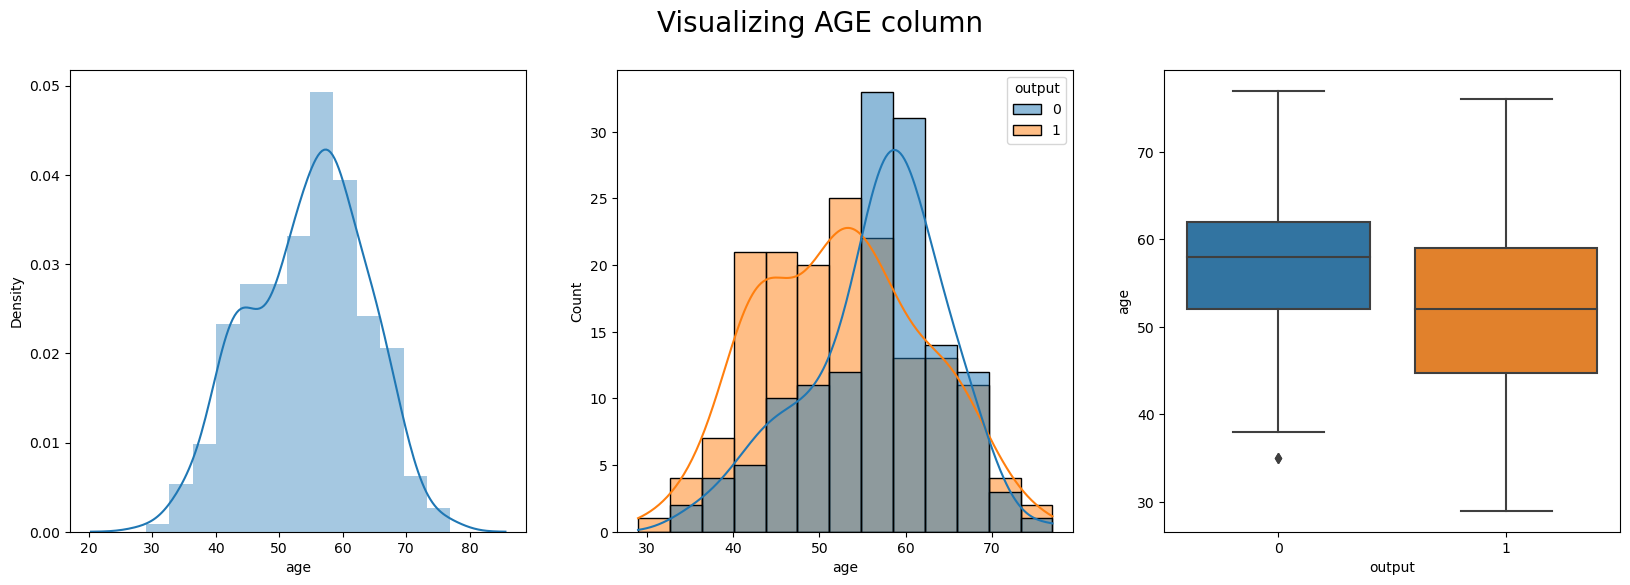

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(heart_prediction['age'],ax=ax[0])
sns.histplot(data =heart_prediction,x='age',ax=ax[1],hue='output',kde=True)
sns.boxplot(x=heart_prediction['output'],y=heart_prediction['age'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

> As it can be seen from the graph maximum people having heart attack are between the age group of 50 and 60.

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


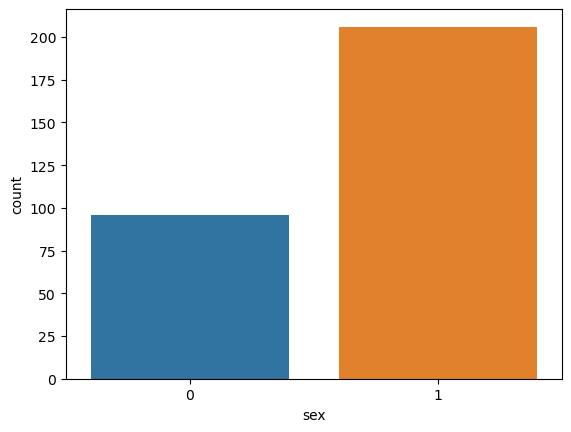

In [11]:
x=(heart_prediction.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=heart_prediction, x="sex")
plt.show()

> As it can be seen that person having heart disease is half than the other person.

Number of people having chest pain as Typical Angina are 143 ,Number of people having sex as atypical angina are 50,Number of people having non-anginal pain are 86,Number of people having asymphotic are 23


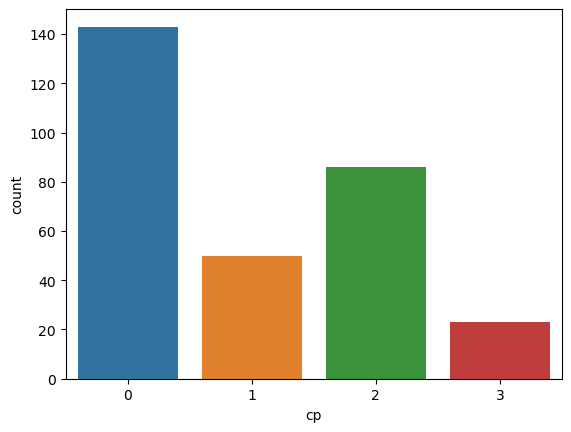

In [12]:
x=(heart_prediction.cp.value_counts())
print(f'Number of people having chest pain as Typical Angina are {x[0]} ,Number of people having sex as atypical angina are {x[1]},Number of people having non-anginal pain are {x[2]},Number of people having asymphotic are {x[3]}')
p = sns.countplot(data=heart_prediction, x="cp")
plt.show()

> As it can be seen from the image most people have typical angina followed by non-anginal pain during the heart disease.

Number of people having Fasting Blood Sugar > 120 are 45 ,Number of people having fasting blood sugar <120 are 257


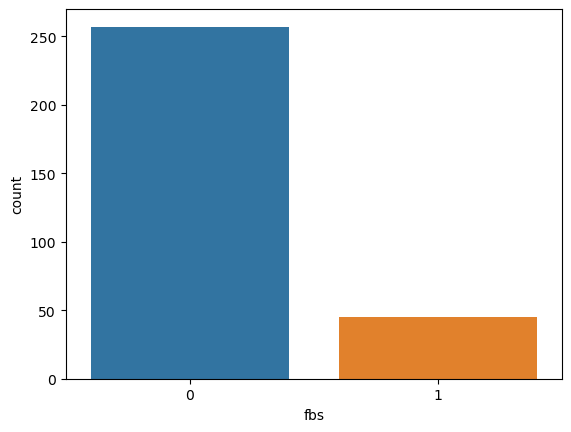

In [13]:
x=(heart_prediction.fbs.value_counts())
print(f'Number of people having Fasting Blood Sugar > 120 are {x[1]} ,Number of people having fasting blood sugar <120 are {x[0]}')
p = sns.countplot(data=heart_prediction, x="fbs")
plt.show()

> It can be concluded that most people did not have fasting blood sugar of greater than 120

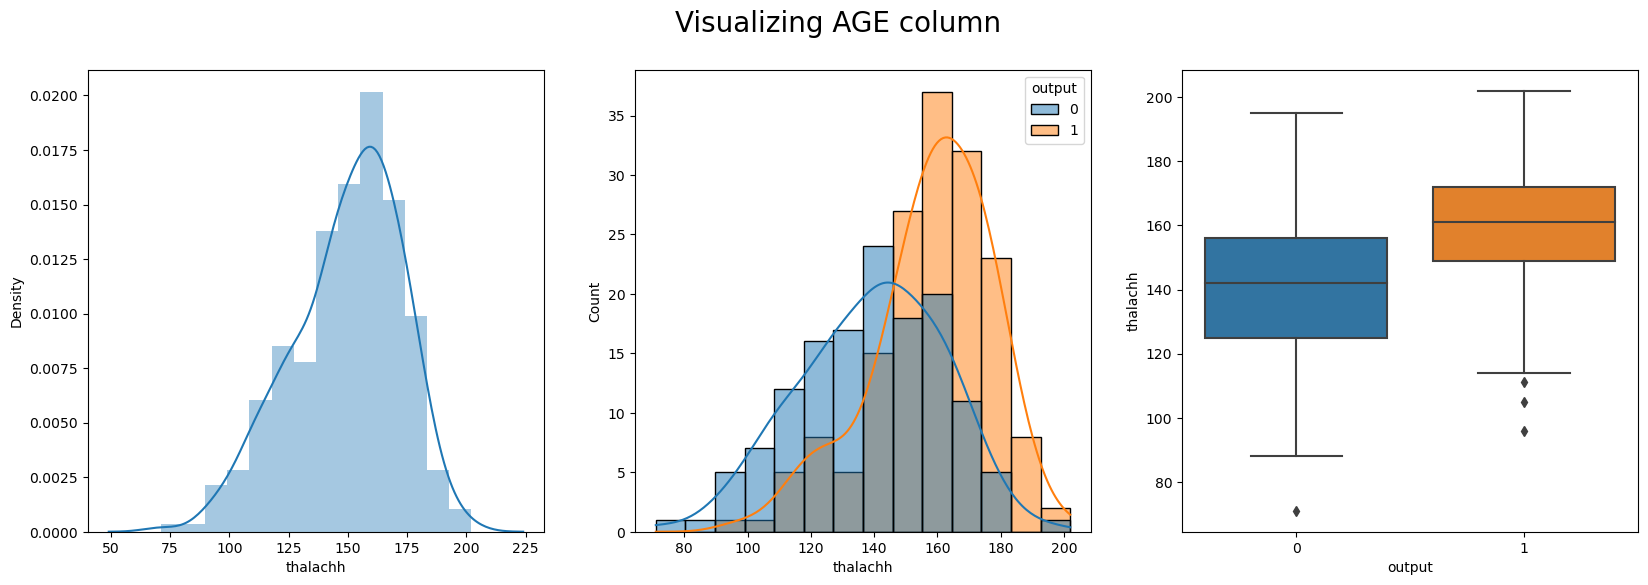

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(heart_prediction['thalachh'],ax=ax[0])
sns.histplot(data =heart_prediction,x='thalachh',ax=ax[1],hue='output',kde=True)
sns.boxplot(x=heart_prediction['output'],y=heart_prediction['thalachh'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

> It can be observed that the maximum thalachh is between 160 and 180 who have heart disease.

<AxesSubplot:>

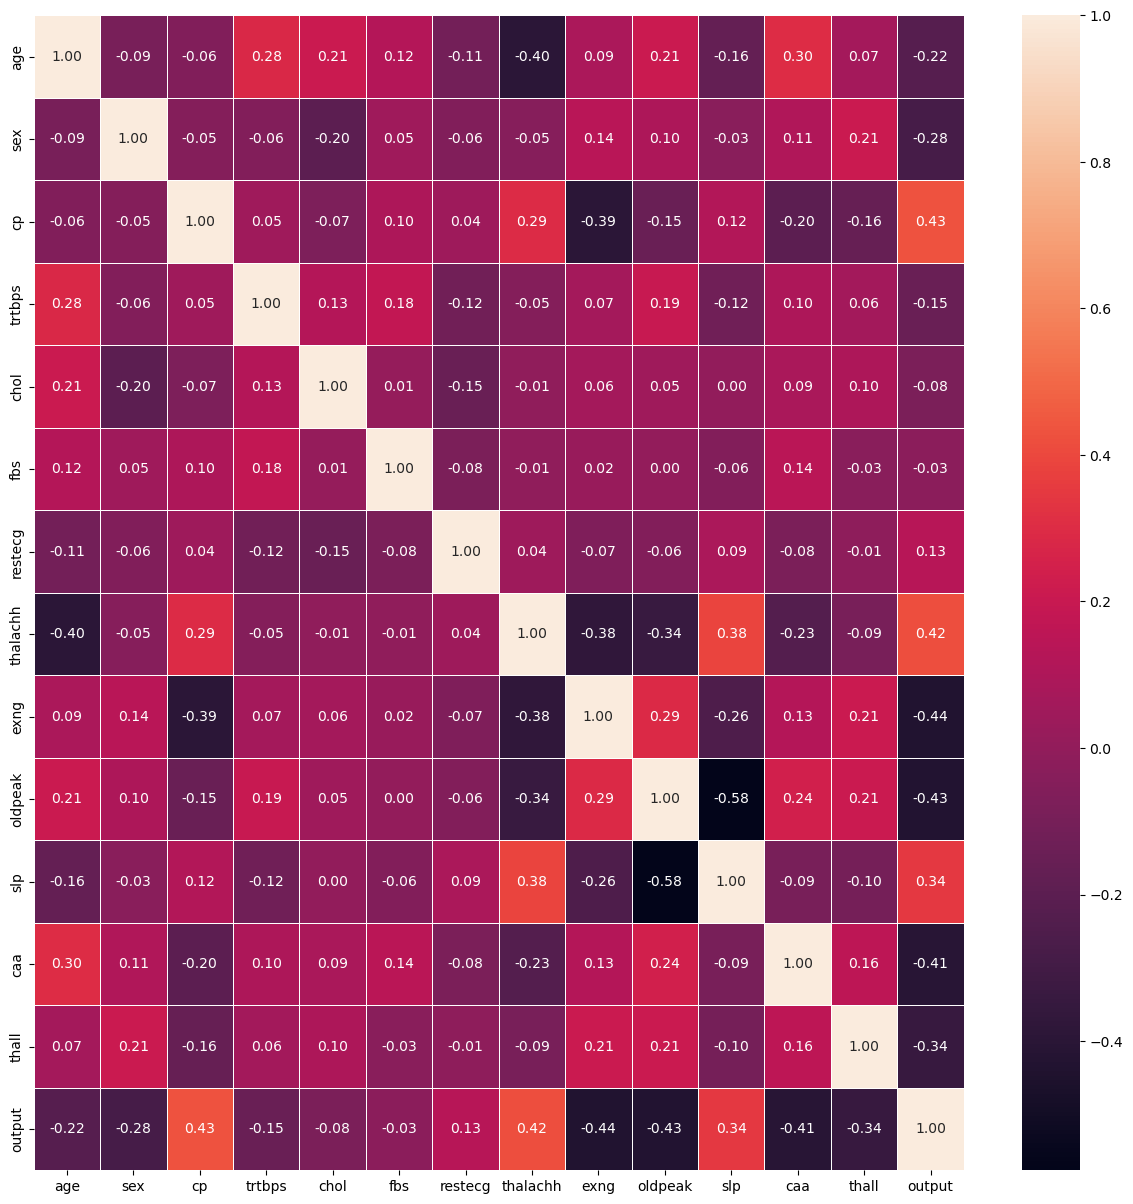

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(heart_prediction.corr(),annot=True,linewidth=0.5,fmt='0.2f')

# Data Preprocessing

In [16]:
x = heart_prediction.iloc[:, 1:-1].values
y = heart_prediction.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train,x_test


(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

# Logistic Regression

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 3 31]]


The accuracy of Logistic Regression is :  88.52459016393442 %


# Gausian Naive Bayes

In [21]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


# Bernoulli Naive Bayes

In [22]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


# Support Vector Machine

In [23]:

model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


# Random Forest Regressor

In [24]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  85.24590163934425 %


# K Nearest Neighbours

In [25]:
  
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[23  4]
 [ 6 28]]
The accuracy of KNN is :  83.60655737704919 %


# Optimizing KNN

Text(0, 0.5, 'Error Rate')

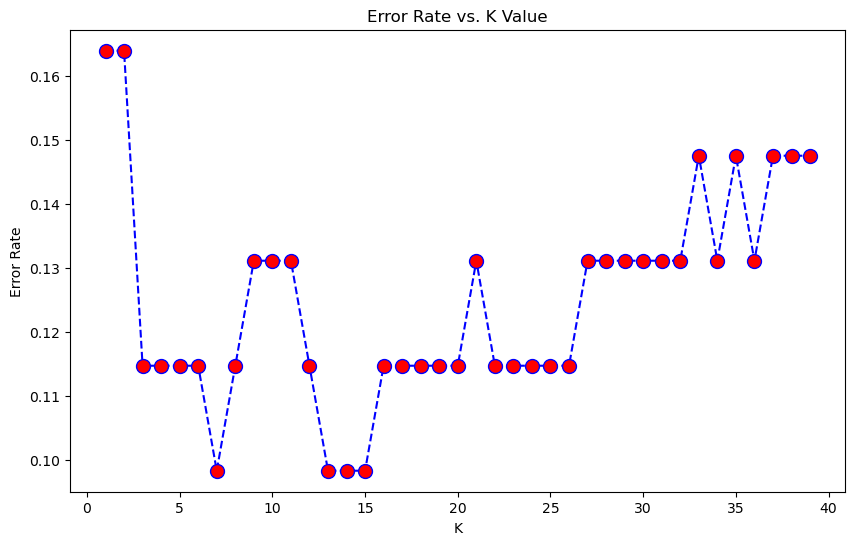

In [26]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[25  2]
 [ 4 30]]


The accuracy of KNN is :  90.1639344262295 %


# Gradient Boosting

In [28]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  80.32786885245902 %


# Conclusion

> Most Models were having great accuracy however svc had the highest accuracy of 91.80%